In [1]:
import ee
import geemap
import pandas as pd
import numpy as np
from geemap import ml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
url = r"D:\MTP\Project\Full_data.csv"
df = pd.read_csv(url)
df.describe()

DEPTH    LATITUDE   LONGITUDE    SALINITY  TEMPERATURE  \
count  646.000000  646.000000  646.000000  646.000000   646.000000   
mean     2.684786   10.461361   -3.121178   33.541130    22.636467   
std      3.777778   29.464631   73.609424    6.263416     8.017222   
min      0.000199  -21.568310 -158.990000    6.556000     0.434000   
25%      0.000249  -19.050987  -27.225407   33.586252    21.053001   
50%      0.000428    2.568500  -24.249015   35.816502    25.924501   
75%      5.340494   30.123250   69.092678   37.108002    28.481001   
max     26.752193   58.872000   91.503000   37.607002    31.066001   

             CPHL  Oa01_radiance  Oa02_radiance  Oa03_radiance  Oa04_radiance  \
count  646.000000   6.460000e+02     646.000000     646.000000     646.000000   
mean     5.141630   1.610683e+05       1.627106       1.503816       1.324144   
std     15.248551   4.884539e+05       0.859736       0.868608       0.904638   
min      0.000000   0.000000e+00       0.361457       0.352295       0.299515   
25%      0.079250   1.004148e+00       1.124533       0.985515       0.760307   
50%      0.131000   1.509709e+00       1.378892       1.233032       1.019502   
75%      0.716500   2.924793e+04       1.860835       1.711364       1.506214   
max     79.000000   1.988859e+06       6.184933       5.958643       5.742620   

       ...  Oa12_radiance  Oa13_radiance  Oa14_radiance  Oa15_radiance  \
count  ...     646.000000     646.000000     646.000000     646.000000   
mean   ...       0.387463       0.270362       0.226076       0.202088   
std    ...       0.442925       0.356090       0.327896       0.260764   
min    ...       0.032398       0.007497       0.008651       0.010536   
25%    ...       0.100794       0.052478       0.047582       0.044776   
50%    ...       0.208788       0.125572       0.099489       0.098771   
75%    ...       0.481473       0.306433       0.275757       0.256805   
max    ...       2.426265       2.020398       2.145498       1.643550   

       Oa16_radiance  Oa17_radiance  Oa18_radiance  Oa19_radiance  \
count     646.000000     646.000000     646.000000     646.000000   
mean        0.246525       0.207191       0.205474       0.163363   
std         0.290378       0.242752       0.248200       0.206701   
min         0.018559       0.009860       0.010999       0.005028   
25%         0.055678       0.044370       0.038497       0.030171   
50%         0.132567       0.108461       0.104493       0.077941   
75%         0.315509       0.261292       0.263982       0.201767   
max         1.638525       1.232510       1.308910       1.116320   

       Oa20_radiance  Oa21_radiance  
count     646.000000     646.000000  
mean        0.071566       0.066238  
std         0.101411       0.091473  
min         0.001632       0.003241  
25%         0.009791       0.009724  
50%         0.029374       0.029171  
75%         0.084858       0.083460  
max         0.610327       0.508865  

[8 rows x 27 columns]

In [3]:
feature_names = ['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance', 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance', 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance', 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']

label = "SALINITY"

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVR  

best_n_estimators = 100
best_max_depth = 25
best_min_samples_split = 2
best_min_samples_leaf = 4
best_max_features = 'sqrt'  

rf = RandomForestRegressor(n_estimators=best_n_estimators, 
                               max_depth=best_max_depth, 
                               min_samples_split=best_min_samples_split, 
                               min_samples_leaf=best_min_samples_leaf, 
                               max_features=best_max_features)


feature_names = ['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance', 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance', 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance', 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
rf_imp_feature_name = ['Oa02_radiance',  'Oa13_radiance',  'Oa19_radiance',  'Oa20_radiance',  'Oa03_radiance',  'Oa14_radiance']
label = "SALINITY"

# Select features and target variable
X = df[feature_names]
y = df[label]

# rf_feature_name = ['sur_refl_b08', 'sur_refl_b12',  'sur_refl_b09',  'sur_refl_b11',  'sur_refl_b10',  'sur_refl_b16']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)


# Calculate RMSE and other metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)


# Calculate nRMSE
max_y = y_test.max()
min_y = y_test.min()
nrmse = rmse / (max_y - min_y)

print('RMSE:', rmse)
print('nRMSE:', nrmse)
print('p-value:', p_value)
print('r:', r_value)


observed_values = np.array(y_test)
predicted_values = np.array(y_pred)

# Calculate Mean Error (ME)
mean_error = np.mean(predicted_values - observed_values)

# Calculate Mean Bias Error (MBE)
mbe = np.mean(np.abs(predicted_values - observed_values))

print(f"Mean Error (ME): {mean_error}")
print(f"Mean Bias Error (MBE): {mbe}")

RMSE: 4.854109388846242
nRMSE: 0.15855847514160518
p-value: 5.430716042153138e-20
r: 0.5953489403087989
Mean Error (ME): -0.444663497989249
Mean Bias Error (MBE): 2.9598738644435656


In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

# Define your Laplacian kernel function
def laplacian_kernel(X1, X2, gamma):
    return np.exp(-gamma * np.linalg.norm(X1[:, np.newaxis] - X2, axis=2))

# Define feature names and label
feature_names = ['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance', 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance', 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance', 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
rf_imp_feature_name = ['Oa02_radiance',  'Oa13_radiance',  'Oa19_radiance',  'Oa20_radiance',  'Oa03_radiance',  'Oa14_radiance']
label = "SALINITY"

# Select features and target variable
X = df[feature_names]
y = df[label]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameters for tuning
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'gamma': [0.01, 0.1, 1.0, 10.0],
    'epsilon': [0.01, 0.1, 1.0]
}


# Calculate the Laplacian kernel values for training data
gamma = 3  
laplacian_matrix_train = laplacian_kernel(X_train, X_train, gamma )

# Perform hyperparameter tuning using GridSearchCV
svr = SVR(kernel='precomputed')
grid_search = GridSearchCV(svr, param_grid, cv=5)
grid_search.fit(laplacian_matrix_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)


In [6]:
C = 10
gamma = 3
epsilon = 0.1 

# Create the Laplacian kernel values for training data
laplacian_matrix_train = laplacian_kernel(X_train, X_train, gamma)

# Create the SVR model with Laplacian kernel and the specified hyperparameters
svr_l = SVR(kernel='precomputed', C=C, gamma=gamma, epsilon=epsilon)

# Fit the SVR model with Laplacian kernel using the specified parameters
svr_l.fit(laplacian_matrix_train, y_train)


SVR(C=10, gamma=3, kernel='precomputed')

In [6]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
# Calculate the Laplacian kernel values for testing data
laplacian_matrix_test = laplacian_kernel(X_test, X_train, gamma)

# Use the best SVR model with Laplacian kernel to predict salinity for testing data
salinity_predictions = svr_l.predict(laplacian_matrix_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, salinity_predictions))
mae = mean_absolute_error(y_test, salinity_predictions)
r_value, _ = pearsonr(y_test, salinity_predictions)
r2 = r2_score(y_test, salinity_predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-Value: {r_value}")
print(f"R^2 Score: {r2}")


NameError: name 'laplacian_kernel' is not defined

In [9]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr


## TIF Data Collection

In [6]:
from osgeo import gdal
import numpy as np


path = r"C:\Users\lenovo\Downloads\delta_03_11-0000021504-0000000000.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))


In [12]:
print(all_pixel_bands.shape)

(7168, 2227, 21)


In [7]:
scale_factors = [1, 0.0139465, 0.0133873, 0.0121481, 0.0115198, 0.0100953, 0.0123538, 0.00879161, 0.00876539, 0.0095103, 0.00773378, 0.00675523, 0.0071996, 0.00749684, 0.0086512, 0.00526779, 0.00530267, 0.00493004, 0.00549962, 0.00502847, 0.00326378, 0.00324118]

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * scale_factors[band_num]
    all_pixel_bands[:, :, band_num - 1] = band_data

# Reshape the array to have dimensions 27698604x9
reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

In [8]:
# Create column names
column_names = [f"Oa{band_num+1}_radiance" for band_num in range(1, num_bands + 1)]

# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=column_names)

print("Shape of DataFrame:", dff.shape)

Shape of DataFrame: (15963136, 21)


In [52]:
#array
np_array=dff.to_numpy()
np.save(r"D:\ACADMIA\Project\Project_alpha\BOB_cropped_data\SEN3\sundarban_delta_03_11.npy",np_array)

print("Data exported")

Data exported


In [9]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\ACADMIA\Project\Project_alpha\BOB_cropped_data\SEN3\delta_03_11.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


## Model Implimentation

In [10]:
columns=['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance', 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance', 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance', 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
dff = pd.DataFrame(new_data, columns=columns)
print(dff.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15963136 entries, 0 to 15963135
Data columns (total 21 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Oa01_radiance  float64
 1   Oa02_radiance  float64
 2   Oa03_radiance  float64
 3   Oa04_radiance  float64
 4   Oa05_radiance  float64
 5   Oa06_radiance  float64
 6   Oa07_radiance  float64
 7   Oa08_radiance  float64
 8   Oa09_radiance  float64
 9   Oa10_radiance  float64
 10  Oa11_radiance  float64
 11  Oa12_radiance  float64
 12  Oa13_radiance  float64
 13  Oa14_radiance  float64
 14  Oa15_radiance  float64
 15  Oa16_radiance  float64
 16  Oa17_radiance  float64
 17  Oa18_radiance  float64
 18  Oa19_radiance  float64
 19  Oa20_radiance  float64
 20  Oa21_radiance  float64
dtypes: float64(21)
memory usage: 2.5 GB
None


In [11]:
dff[columns] = dff[columns].fillna(0)

In [12]:
X_new=dff[columns]
X_new

Oa01_radiance  Oa02_radiance  Oa03_radiance  Oa04_radiance  \
0                   0.0            0.0            0.0            0.0   
1                   0.0            0.0            0.0            0.0   
2                   0.0            0.0            0.0            0.0   
3                   0.0            0.0            0.0            0.0   
4                   0.0            0.0            0.0            0.0   
...                 ...            ...            ...            ...   
15963131            0.0            0.0            0.0            0.0   
15963132            0.0            0.0            0.0            0.0   
15963133            0.0            0.0            0.0            0.0   
15963134            0.0            0.0            0.0            0.0   
15963135            0.0            0.0            0.0            0.0   

          Oa05_radiance  Oa06_radiance  Oa07_radiance  Oa08_radiance  \
0                   0.0            0.0            0.0            0.0   
1                   0.0            0.0            0.0            0.0   
2                   0.0            0.0            0.0            0.0   
3                   0.0            0.0            0.0            0.0   
4                   0.0            0.0            0.0            0.0   
...                 ...            ...            ...            ...   
15963131            0.0            0.0            0.0            0.0   
15963132            0.0            0.0            0.0            0.0   
15963133            0.0            0.0            0.0            0.0   
15963134            0.0            0.0            0.0            0.0   
15963135            0.0            0.0            0.0            0.0   

          Oa09_radiance  Oa10_radiance  ...  Oa12_radiance  Oa13_radiance  \
0                   0.0            0.0  ...            0.0            0.0   
1                   0.0            0.0  ...            0.0            0.0   
2                   0.0            0.0  ...            0.0            0.0   
3                   0.0            0.0  ...            0.0            0.0   
4                   0.0            0.0  ...            0.0            0.0   
...                 ...            ...  ...            ...            ...   
15963131            0.0            0.0  ...            0.0            0.0   
15963132            0.0            0.0  ...            0.0            0.0   
15963133            0.0            0.0  ...            0.0            0.0   
15963134            0.0            0.0  ...            0.0            0.0   
15963135            0.0            0.0  ...            0.0            0.0   

          Oa14_radiance  Oa15_radiance  Oa16_radiance  Oa17_radiance  \
0                   0.0            0.0            0.0            0.0   
1                   0.0            0.0            0.0            0.0   
2                   0.0            0.0            0.0            0.0   
3                   0.0            0.0            0.0            0.0   
4                   0.0            0.0            0.0            0.0   
...                 ...            ...            ...            ...   
15963131            0.0            0.0            0.0            0.0   
15963132            0.0            0.0            0.0            0.0   
15963133            0.0            0.0            0.0            0.0   
15963134            0.0            0.0            0.0            0.0   
15963135            0.0            0.0            0.0            0.0   

          Oa18_radiance  Oa19_radiance  Oa20_radiance  Oa21_radiance  
0                   0.0            0.0            0.0            0.0  
1                   0.0            0.0            0.0            0.0  
2                   0.0            0.0            0.0            0.0  
3                   0.0            0.0            0.0            0.0  
4                   0.0            0.0            0.0            0.0  
...                 ...            ...            ...           

In [13]:
# Make predictions using the trained model
predictions = rf.predict(X_new)

In [31]:
print(predictions.shape)

(15963136,)


In [16]:
data=np.reshape(predictions,(7168, 2227))

In [34]:
print(data)

[[28.44242252 28.44242252 28.44242252 ... 28.44242252 28.44242252
  28.44242252]
 [28.44242252 28.44242252 28.44242252 ... 28.44242252 28.44242252
  28.44242252]
 [28.44242252 28.44242252 28.44242252 ... 28.44242252 28.44242252
  28.44242252]
 ...
 [28.44242252 28.44242252 28.44242252 ... 28.44242252 28.44242252
  28.44242252]
 [28.44242252 28.44242252 28.44242252 ... 28.44242252 28.44242252
  28.44242252]
 [28.44242252 28.44242252 28.44242252 ... 28.44242252 28.44242252
  28.44242252]]


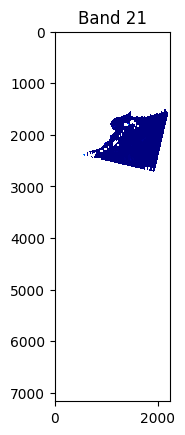

In [14]:
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

In [17]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

Image saved successfully to C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission\delta_sen_salinity_map_wc.pdf


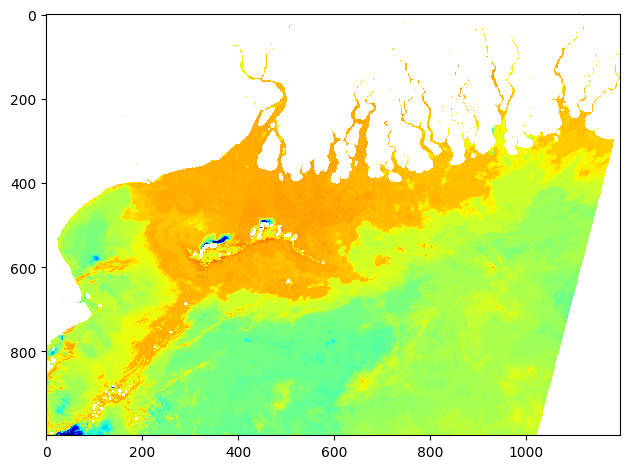

In [18]:
# Visualize the predicted salinity map using matplotlib
plt.imshow(data[1250:2250,1030:],aspect="auto", cmap='jet', vmin=20, vmax=40)
# plt.colorbar(label='Predicted Salinity (ppt)', fontsize=17)
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
# plt.title('Predicted Salinity Map')

save_directory = r'C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission'
file_name = 'delta_sen_salinity_map_wc.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

# Show the violin plot
plt.show()

In [55]:
print(r"$$\textit{in-situ}")

$$\textit{in-situ}


'$$\\textit{in-situ}'

In [20]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

Image saved successfully to C:\Users\lenovo\OneDrive\Project\Results\test\bob_modis_cropped_image.png


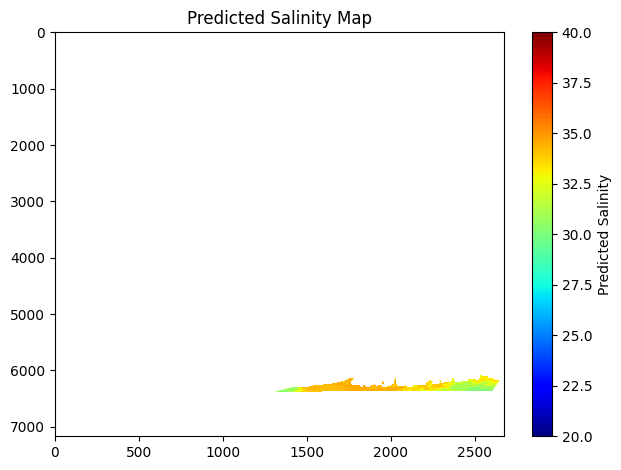

In [22]:
# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect="auto", cmap='jet', vmin=20, vmax=40)
plt.colorbar(label='Predicted Salinity')
plt.title('Predicted Salinity Map')

# Specify the directory and filename for saving the image
save_directory = r'C:\Users\lenovo\OneDrive\Project\Results\test'
file_name = 'bob_modis_cropped_image.png'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=300, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()

## LAplace

In [ ]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\ACADMIA\Project\Project_alpha\BOB_cropped_data\MODIS\bob_image_data.npy")
print(new_data[1:,])

In [ ]:
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']
dff = pd.DataFrame(new_data, columns=columns)
print(dff.info())

In [ ]:
# Preprocess the new data: select the same features as in the training data
X_nue = dff[feature_names]

# # # Make predictions using the trained model
# predictions = rf.predict(X_new)
# # np.save(r"D:\ACADMIA\Project\Project_alpha\SALINITY.npy",predictions)

In [ ]:
data=np.reshape(predictions,(4398,6298))

In [ ]:
import numpy as np
from sklearn.svm import SVR

# Define your Laplacian kernel function
def laplacian_kernel(xi, xj, gamma):
    return np.exp(-gamma * np.linalg.norm(xi - xj))

feature_names = ['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']
label = "SALINITY"

X=df[feature_names]
y=df[label]

# Define the Laplacian matrix L based on the Laplacian kernel
gamma = 1.0  # Adjust this as needed


# Example usage:

# Calculate the Laplacian matrix L based on the Laplacian kernel
n_samples = len(X)
laplacian_matrix = np.zeros((n_samples, n_samples))

for i in range(n_samples):
    for j in range(n_samples):
        laplacian_matrix[i, j] = laplacian_kernel(X.iloc[i], X.iloc[j], gamma)

# Define hyperparameters
C = 1.0  # Adjust this as needed

# Create the Laplacian Embedded Regression model
svr = SVR(C=C, kernel='precomputed')
svr.fit(laplacian_matrix, y)

# Now, you can make salinity predictions using the trained model
# Example: Predict the salinity for a new data point (x_new)
# x_new = ...  # Your new data point

# Calculate the Laplacian kernel values between x_new and all data points in X
laplacian_kernel_values = np.array([laplacian_kernel(X_nue, xi, gamma) for xi in X])

# Use the Laplacian Embedded Regression model to predict salinity
salinity_prediction = svr.predict([laplacian_kernel_values])

# salinity_prediction contains the predicted salinity value for x_new


# March 22

In [7]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_March_22.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))



In [8]:
print(all_pixel_bands.shape)

(1336, 2249, 21)


In [12]:
scale_factors = [1, 0.0139465, 0.0133873, 0.0121481, 0.0115198, 0.0100953, 0.0123538, 0.00879161, 0.00876539, 0.0095103, 0.00773378, 0.00675523, 0.0071996, 0.00749684, 0.0086512, 0.00526779, 0.00530267, 0.00493004, 0.00549962, 0.00502847, 0.00326378, 0.00324118]

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * scale_factors[band_num]
    all_pixel_bands[:, :, band_num - 1] = band_data

# Reshape the array to have dimensions 27698604x9
reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

columns=['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance', 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance', 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance', 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

Shape of DataFrame: (3004664, 21)


In [13]:
#array
np_array=dff.to_numpy()
np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_March_22.npy",np_array)

print("Data exported")

Data exported


In [14]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_March_22.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [15]:
dff[columns] = dff[columns].fillna(0)

In [16]:
X_new=dff[columns]
X_new

Oa01_radiance  Oa02_radiance  Oa03_radiance  Oa04_radiance  \
0                  0.0            0.0            0.0            0.0   
1                  0.0            0.0            0.0            0.0   
2                  0.0            0.0            0.0            0.0   
3                  0.0            0.0            0.0            0.0   
4                  0.0            0.0            0.0            0.0   
...                ...            ...            ...            ...   
3004659            0.0            0.0            0.0            0.0   
3004660            0.0            0.0            0.0            0.0   
3004661            0.0            0.0            0.0            0.0   
3004662            0.0            0.0            0.0            0.0   
3004663            0.0            0.0            0.0            0.0   

         Oa05_radiance  Oa06_radiance  Oa07_radiance  Oa08_radiance  \
0                  0.0            0.0            0.0            0.0   
1                  0.0            0.0            0.0            0.0   
2                  0.0            0.0            0.0            0.0   
3                  0.0            0.0            0.0            0.0   
4                  0.0            0.0            0.0            0.0   
...                ...            ...            ...            ...   
3004659            0.0            0.0            0.0            0.0   
3004660            0.0            0.0            0.0            0.0   
3004661            0.0            0.0            0.0            0.0   
3004662            0.0            0.0            0.0            0.0   
3004663            0.0            0.0            0.0            0.0   

         Oa09_radiance  Oa10_radiance  ...  Oa12_radiance  Oa13_radiance  \
0                  0.0            0.0  ...            0.0            0.0   
1                  0.0            0.0  ...            0.0            0.0   
2                  0.0            0.0  ...            0.0            0.0   
3                  0.0            0.0  ...            0.0            0.0   
4                  0.0            0.0  ...            0.0            0.0   
...                ...            ...  ...            ...            ...   
3004659            0.0            0.0  ...            0.0            0.0   
3004660            0.0            0.0  ...            0.0            0.0   
3004661            0.0            0.0  ...            0.0            0.0   
3004662            0.0            0.0  ...            0.0            0.0   
3004663            0.0            0.0  ...            0.0            0.0   

         Oa14_radiance  Oa15_radiance  Oa16_radiance  Oa17_radiance  \
0                  0.0            0.0            0.0            0.0   
1                  0.0            0.0            0.0            0.0   
2                  0.0            0.0            0.0            0.0   
3                  0.0            0.0            0.0            0.0   
4                  0.0            0.0            0.0            0.0   
...                ...            ...            ...            ...   
3004659            0.0            0.0            0.0            0.0   
3004660            0.0            0.0            0.0            0.0   
3004661            0.0            0.0            0.0            0.0   
3004662            0.0            0.0            0.0            0.0   
3004663            0.0            0.0            0.0            0.0   

         Oa18_radiance  Oa19_radiance  Oa20_radiance  Oa21_radiance  
0                  0.0            0.0            0.0            0.0  
1                  0.0            0.0            0.0            0.0  
2                  0.0            0.0            0.0            0.0  
3                  0.0            0.0            0.0            0.0  
4                  0.0            0.0            0.0            0.0  
...                ...            ...            ...            ...  
3004659            0.0            0.0          

In [17]:
# Make predictions using the trained model
predictions = rf.predict(X_new)

In [19]:
data=np.reshape(predictions,(1336, 2249))
print(data)

[[30.29886117 30.29886117 30.29886117 ... 30.29886117 30.29886117
  30.29886117]
 [30.29886117 30.29886117 30.29886117 ... 30.29886117 30.29886117
  30.29886117]
 [30.29886117 30.29886117 30.29886117 ... 30.29886117 30.29886117
  30.29886117]
 ...
 [30.29886117 30.29886117 30.29886117 ... 30.29886117 30.29886117
  30.29886117]
 [30.29886117 30.29886117 30.29886117 ... 30.29886117 30.29886117
  30.29886117]
 [30.29886117 30.29886117 30.29886117 ... 30.29886117 30.29886117
  30.29886117]]


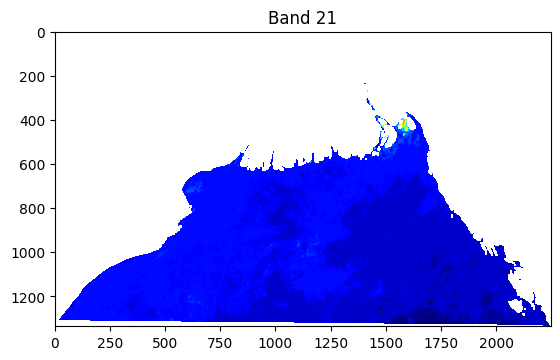

In [20]:
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_March_22.pdf


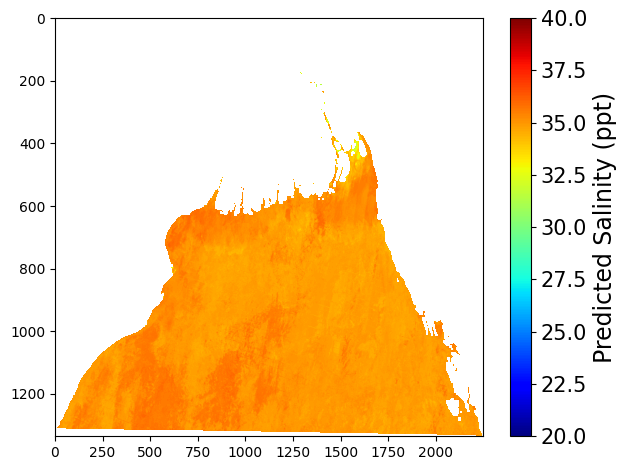

In [32]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect="auto", cmap='jet', vmin=20, vmax=40)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

save_directory = r'D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3'
file_name = 'SEN3_BOB_Composite_March_22.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

# Show the violin plot
plt.show()

# April 22

In [33]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_April_22.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

print(all_pixel_bands.shape)

(1336, 2249, 21)


In [34]:
scale_factors = [1, 0.0139465, 0.0133873, 0.0121481, 0.0115198, 0.0100953, 0.0123538, 0.00879161, 0.00876539, 0.0095103, 0.00773378, 0.00675523, 0.0071996, 0.00749684, 0.0086512, 0.00526779, 0.00530267, 0.00493004, 0.00549962, 0.00502847, 0.00326378, 0.00324118]

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * scale_factors[band_num]
    all_pixel_bands[:, :, band_num - 1] = band_data

# Reshape the array to have dimensions 27698604x9
reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

columns=['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance', 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance', 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance', 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

Shape of DataFrame: (3004664, 21)


In [35]:
#array
np_array=dff.to_numpy()
np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_April_22.npy",np_array)

print("Data exported")

Data exported


In [36]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_April_22.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [37]:
dff[columns] = dff[columns].fillna(0)

In [38]:
X_new=dff[columns]
X_new

Oa01_radiance  Oa02_radiance  Oa03_radiance  Oa04_radiance  \
0                  0.0            0.0            0.0            0.0   
1                  0.0            0.0            0.0            0.0   
2                  0.0            0.0            0.0            0.0   
3                  0.0            0.0            0.0            0.0   
4                  0.0            0.0            0.0            0.0   
...                ...            ...            ...            ...   
3004659            0.0            0.0            0.0            0.0   
3004660            0.0            0.0            0.0            0.0   
3004661            0.0            0.0            0.0            0.0   
3004662            0.0            0.0            0.0            0.0   
3004663            0.0            0.0            0.0            0.0   

         Oa05_radiance  Oa06_radiance  Oa07_radiance  Oa08_radiance  \
0                  0.0            0.0            0.0            0.0   
1                  0.0            0.0            0.0            0.0   
2                  0.0            0.0            0.0            0.0   
3                  0.0            0.0            0.0            0.0   
4                  0.0            0.0            0.0            0.0   
...                ...            ...            ...            ...   
3004659            0.0            0.0            0.0            0.0   
3004660            0.0            0.0            0.0            0.0   
3004661            0.0            0.0            0.0            0.0   
3004662            0.0            0.0            0.0            0.0   
3004663            0.0            0.0            0.0            0.0   

         Oa09_radiance  Oa10_radiance  ...  Oa12_radiance  Oa13_radiance  \
0                  0.0            0.0  ...            0.0            0.0   
1                  0.0            0.0  ...            0.0            0.0   
2                  0.0            0.0  ...            0.0            0.0   
3                  0.0            0.0  ...            0.0            0.0   
4                  0.0            0.0  ...            0.0            0.0   
...                ...            ...  ...            ...            ...   
3004659            0.0            0.0  ...            0.0            0.0   
3004660            0.0            0.0  ...            0.0            0.0   
3004661            0.0            0.0  ...            0.0            0.0   
3004662            0.0            0.0  ...            0.0            0.0   
3004663            0.0            0.0  ...            0.0            0.0   

         Oa14_radiance  Oa15_radiance  Oa16_radiance  Oa17_radiance  \
0                  0.0            0.0            0.0            0.0   
1                  0.0            0.0            0.0            0.0   
2                  0.0            0.0            0.0            0.0   
3                  0.0            0.0            0.0            0.0   
4                  0.0            0.0            0.0            0.0   
...                ...            ...            ...            ...   
3004659            0.0            0.0            0.0            0.0   
3004660            0.0            0.0            0.0            0.0   
3004661            0.0            0.0            0.0            0.0   
3004662            0.0            0.0            0.0            0.0   
3004663            0.0            0.0            0.0            0.0   

         Oa18_radiance  Oa19_radiance  Oa20_radiance  Oa21_radiance  
0                  0.0            0.0            0.0            0.0  
1                  0.0            0.0            0.0            0.0  
2                  0.0            0.0            0.0            0.0  
3                  0.0            0.0            0.0            0.0  
4                  0.0            0.0            0.0            0.0  
...                ...            ...            ...            ...  
3004659            0.0            0.0          

In [39]:
# Make predictions using the trained model
predictions = rf.predict(X_new)

data=np.reshape(predictions,(1336, 2249))
print(data)

[[30.29886117 30.29886117 30.29886117 ... 30.29886117 30.29886117
  30.29886117]
 [30.29886117 30.29886117 30.29886117 ... 30.29886117 30.29886117
  30.29886117]
 [30.29886117 30.29886117 30.29886117 ... 30.29886117 30.29886117
  30.29886117]
 ...
 [30.29886117 30.29886117 30.29886117 ... 30.29886117 30.29886117
  30.29886117]
 [30.29886117 30.29886117 30.29886117 ... 30.29886117 30.29886117
  30.29886117]
 [30.29886117 30.29886117 30.29886117 ... 30.29886117 30.29886117
  30.29886117]]


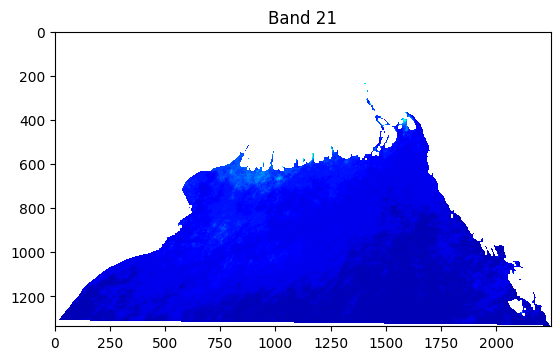

In [40]:
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_April_22.pdf


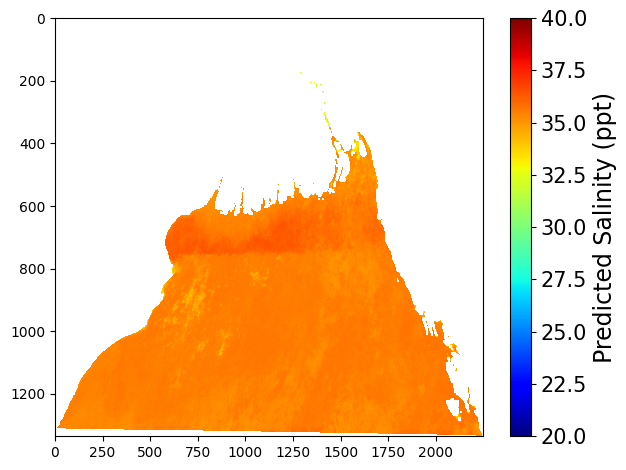

In [41]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect="auto", cmap='jet', vmin=20, vmax=40)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

save_directory = r'D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3'
file_name = 'SEN3_BOB_Composite_April_22.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

# Show the violin plot
plt.show()

# MAY

In [42]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_MAY_22.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

print(all_pixel_bands.shape)

(1336, 2249, 21)


In [43]:
scale_factors = [1, 0.0139465, 0.0133873, 0.0121481, 0.0115198, 0.0100953, 0.0123538, 0.00879161, 0.00876539, 0.0095103, 0.00773378, 0.00675523, 0.0071996, 0.00749684, 0.0086512, 0.00526779, 0.00530267, 0.00493004, 0.00549962, 0.00502847, 0.00326378, 0.00324118]

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * scale_factors[band_num]
    all_pixel_bands[:, :, band_num - 1] = band_data

# Reshape the array to have dimensions 27698604x9
reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

columns=['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance', 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance', 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance', 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

Shape of DataFrame: (3004664, 21)


In [44]:
#array
np_array=dff.to_numpy()
np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_May_22.npy",np_array)

print("Data exported")

Data exported


In [45]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_April_22.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [46]:
dff[columns] = dff[columns].fillna(0)

In [47]:
X_new=dff[columns]
X_new

Oa01_radiance  Oa02_radiance  Oa03_radiance  Oa04_radiance  \
0                  0.0            0.0            0.0            0.0   
1                  0.0            0.0            0.0            0.0   
2                  0.0            0.0            0.0            0.0   
3                  0.0            0.0            0.0            0.0   
4                  0.0            0.0            0.0            0.0   
...                ...            ...            ...            ...   
3004659            0.0            0.0            0.0            0.0   
3004660            0.0            0.0            0.0            0.0   
3004661            0.0            0.0            0.0            0.0   
3004662            0.0            0.0            0.0            0.0   
3004663            0.0            0.0            0.0            0.0   

         Oa05_radiance  Oa06_radiance  Oa07_radiance  Oa08_radiance  \
0                  0.0            0.0            0.0            0.0   
1                  0.0            0.0            0.0            0.0   
2                  0.0            0.0            0.0            0.0   
3                  0.0            0.0            0.0            0.0   
4                  0.0            0.0            0.0            0.0   
...                ...            ...            ...            ...   
3004659            0.0            0.0            0.0            0.0   
3004660            0.0            0.0            0.0            0.0   
3004661            0.0            0.0            0.0            0.0   
3004662            0.0            0.0            0.0            0.0   
3004663            0.0            0.0            0.0            0.0   

         Oa09_radiance  Oa10_radiance  ...  Oa12_radiance  Oa13_radiance  \
0                  0.0            0.0  ...            0.0            0.0   
1                  0.0            0.0  ...            0.0            0.0   
2                  0.0            0.0  ...            0.0            0.0   
3                  0.0            0.0  ...            0.0            0.0   
4                  0.0            0.0  ...            0.0            0.0   
...                ...            ...  ...            ...            ...   
3004659            0.0            0.0  ...            0.0            0.0   
3004660            0.0            0.0  ...            0.0            0.0   
3004661            0.0            0.0  ...            0.0            0.0   
3004662            0.0            0.0  ...            0.0            0.0   
3004663            0.0            0.0  ...            0.0            0.0   

         Oa14_radiance  Oa15_radiance  Oa16_radiance  Oa17_radiance  \
0                  0.0            0.0            0.0            0.0   
1                  0.0            0.0            0.0            0.0   
2                  0.0            0.0            0.0            0.0   
3                  0.0            0.0            0.0            0.0   
4                  0.0            0.0            0.0            0.0   
...                ...            ...            ...            ...   
3004659            0.0            0.0            0.0            0.0   
3004660            0.0            0.0            0.0            0.0   
3004661            0.0            0.0            0.0            0.0   
3004662            0.0            0.0            0.0            0.0   
3004663            0.0            0.0            0.0            0.0   

         Oa18_radiance  Oa19_radiance  Oa20_radiance  Oa21_radiance  
0                  0.0            0.0            0.0            0.0  
1                  0.0            0.0            0.0            0.0  
2                  0.0            0.0            0.0            0.0  
3                  0.0            0.0            0.0            0.0  
4                  0.0            0.0            0.0            0.0  
...                ...            ...            ...            ...  
3004659            0.0            0.0          

In [48]:
# Make predictions using the trained model
predictions = rf.predict(X_new)

data=np.reshape(predictions,(1336, 2249))
print(data)

[[30.29886117 30.29886117 30.29886117 ... 30.29886117 30.29886117
  30.29886117]
 [30.29886117 30.29886117 30.29886117 ... 30.29886117 30.29886117
  30.29886117]
 [30.29886117 30.29886117 30.29886117 ... 30.29886117 30.29886117
  30.29886117]
 ...
 [30.29886117 30.29886117 30.29886117 ... 30.29886117 30.29886117
  30.29886117]
 [30.29886117 30.29886117 30.29886117 ... 30.29886117 30.29886117
  30.29886117]
 [30.29886117 30.29886117 30.29886117 ... 30.29886117 30.29886117
  30.29886117]]


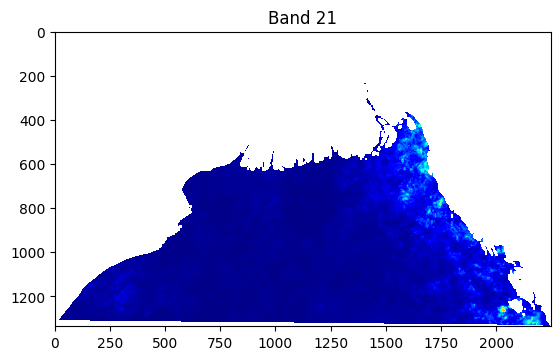

In [49]:
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_May_22.pdf


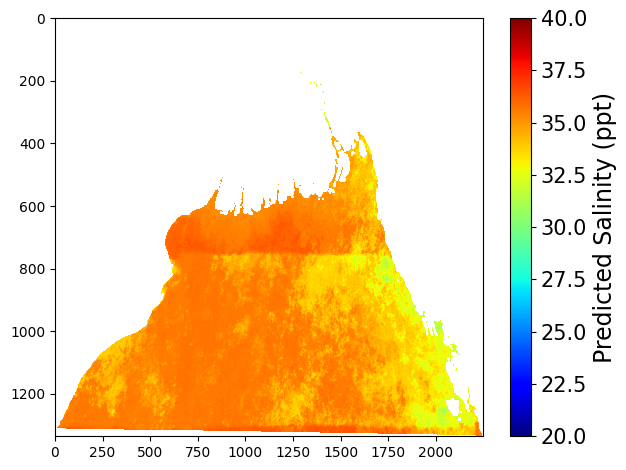

In [50]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect="auto", cmap='jet', vmin=20, vmax=40)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

save_directory = r'D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3'
file_name = 'SEN3_BOB_Composite_May_22.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

# Show the violin plot
plt.show()

# JUNE

In [21]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_COmposite_JUNE_22.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

scale_factors = [1, 0.0139465, 0.0133873, 0.0121481, 0.0115198, 0.0100953, 0.0123538, 0.00879161, 0.00876539, 0.0095103, 0.00773378, 0.00675523, 0.0071996, 0.00749684, 0.0086512, 0.00526779, 0.00530267, 0.00493004, 0.00549962, 0.00502847, 0.00326378, 0.00324118]
for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * scale_factors[band_num]
    all_pixel_bands[:, :, band_num - 1] = band_data


print(all_pixel_bands.shape)


reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

columns=['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance', 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance', 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance', 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

(1336, 2249, 21)
Shape of DataFrame: (3004664, 21)


In [53]:
#array
np_array=dff.to_numpy()
np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_June_22.npy",np_array)

print("Data exported")

Data exported


In [6]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_June_22.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [11]:
dff[columns] = dff[columns].fillna(0)

In [15]:
X_new=dff[columns]
X_new

# Make predictions using the trained model
predictions = rf.predict(X_new)

data=np.reshape(predictions,(1336, 2249))
print(predictions.shape)
print(data)

(3004664,)
[[30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 ...
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]]


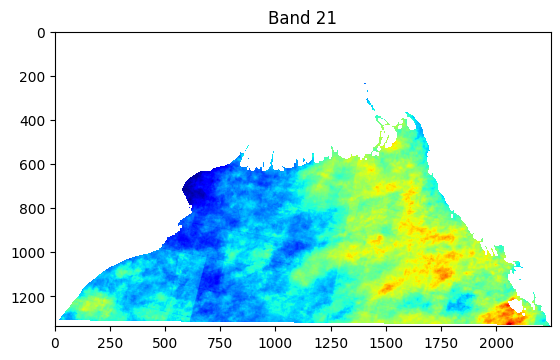

In [16]:
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_June_22.pdf


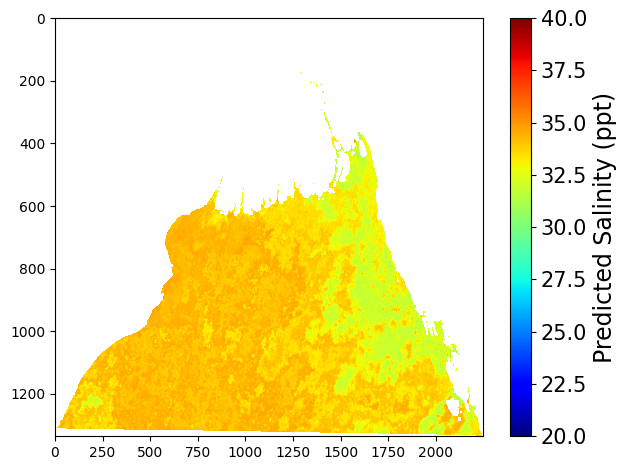

In [20]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect="auto", cmap='jet', vmin=20, vmax=40)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

save_directory = r'D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3'
file_name = 'SEN3_BOB_Composite_June_22.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

# Show the violin plot
plt.show()

# Jan_Composite

In [22]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_Jan_23.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

scale_factors = [1, 0.0139465, 0.0133873, 0.0121481, 0.0115198, 0.0100953, 0.0123538, 0.00879161, 0.00876539, 0.0095103, 0.00773378, 0.00675523, 0.0071996, 0.00749684, 0.0086512, 0.00526779, 0.00530267, 0.00493004, 0.00549962, 0.00502847, 0.00326378, 0.00324118]
for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * scale_factors[band_num]
    all_pixel_bands[:, :, band_num - 1] = band_data


print(all_pixel_bands.shape)


reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

columns=['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance', 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance', 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance', 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

(1336, 2249, 21)
Shape of DataFrame: (3004664, 21)


In [23]:
#array
np_array=dff.to_numpy()
np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_Jan.npy",np_array)

print("Data exported")

Data exported


In [24]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_Jan.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [25]:
dff[columns] = dff[columns].fillna(0)

In [26]:
X_new=dff[columns]
X_new

# Make predictions using the trained model
predictions = rf.predict(X_new)

data=np.reshape(predictions,(1336, 2249))
print(predictions.shape)
print(data)

(3004664,)
[[30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 ...
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]]


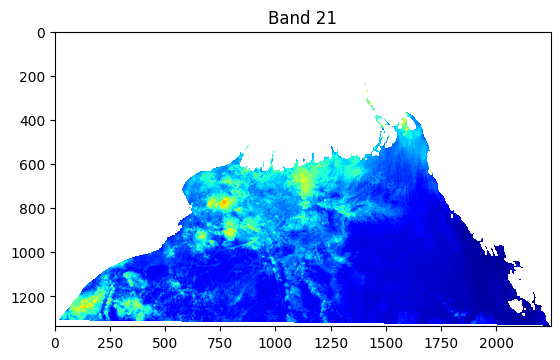

In [27]:
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_Jan_22.pdf


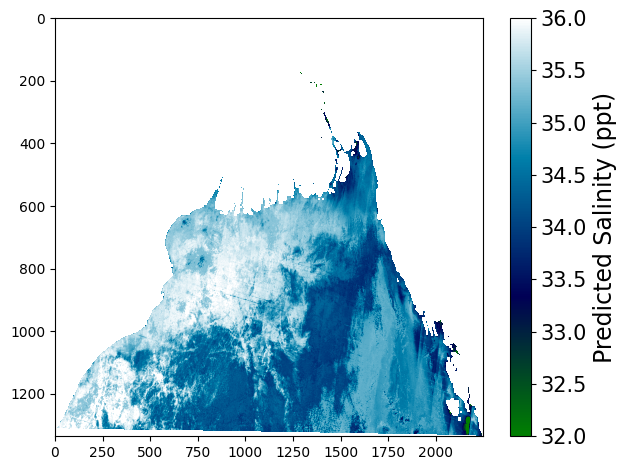

In [32]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect="auto", cmap='ocean', vmin=32, vmax=36)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

save_directory = r'D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3'
file_name = 'SEN3_BOB_Composite_Mean_Jan_22.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

# Show the violin plot
plt.show()

# Feb_Composite

In [35]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_Feb_23.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

scale_factors = [1, 0.0139465, 0.0133873, 0.0121481, 0.0115198, 0.0100953, 0.0123538, 0.00879161, 0.00876539, 0.0095103, 0.00773378, 0.00675523, 0.0071996, 0.00749684, 0.0086512, 0.00526779, 0.00530267, 0.00493004, 0.00549962, 0.00502847, 0.00326378, 0.00324118]
for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * scale_factors[band_num]
    all_pixel_bands[:, :, band_num - 1] = band_data


print(all_pixel_bands.shape)


reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

columns=['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance', 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance', 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance', 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

(1336, 2249, 21)
Shape of DataFrame: (3004664, 21)


In [36]:
#array
np_array=dff.to_numpy()
np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_Feb.npy",np_array)

print("Data exported")

Data exported


In [37]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_Feb.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [38]:
dff[columns] = dff[columns].fillna(0)

In [39]:
X_new=dff[columns]
X_new

# Make predictions using the trained model
predictions = rf.predict(X_new)

data=np.reshape(predictions,(1336, 2249))
print(predictions.shape)
print(data)

(3004664,)
[[30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 ...
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]]


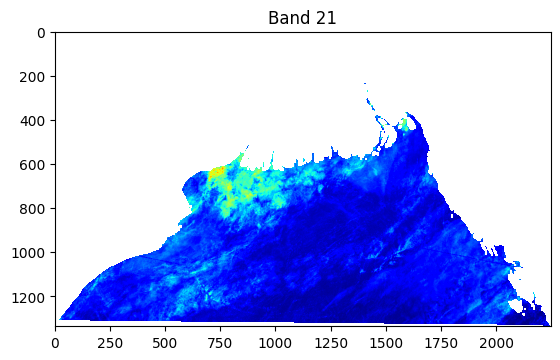

In [40]:
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_Feb_22.pdf


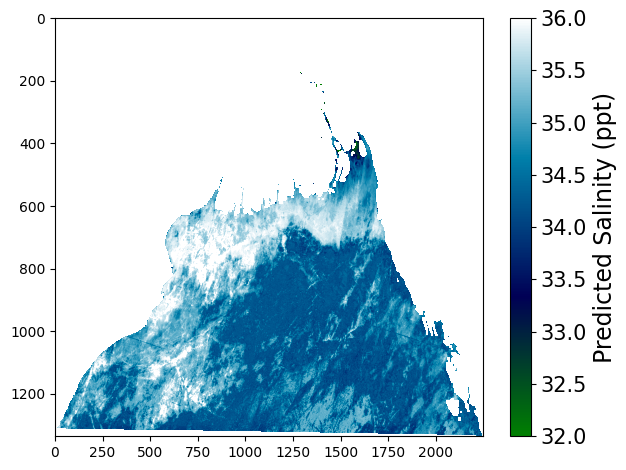

In [41]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect="auto", cmap='ocean', vmin=32, vmax=36)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

save_directory = r'D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3'
file_name = 'SEN3_BOB_Composite_Mean_Feb_22.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

# Show the violin plot
plt.show()

# DEC_Composite

In [54]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_Dec_22.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

scale_factors = [1, 0.0139465, 0.0133873, 0.0121481, 0.0115198, 0.0100953, 0.0123538, 0.00879161, 0.00876539, 0.0095103, 0.00773378, 0.00675523, 0.0071996, 0.00749684, 0.0086512, 0.00526779, 0.00530267, 0.00493004, 0.00549962, 0.00502847, 0.00326378, 0.00324118]
for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * scale_factors[band_num]
    all_pixel_bands[:, :, band_num - 1] = band_data


print(all_pixel_bands.shape)


reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

columns=['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance', 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance', 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance', 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

(1336, 2249, 21)
Shape of DataFrame: (3004664, 21)


In [55]:
#array
np_array=dff.to_numpy()
np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_Dec.npy",np_array)

print("Data exported")

Data exported


In [56]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_Dec.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [57]:
dff[columns] = dff[columns].fillna(0)

In [58]:
X_new=dff[columns]
X_new

# Make predictions using the trained model
predictions = rf.predict(X_new)

data=np.reshape(predictions,(1336, 2249))
print(predictions.shape)
print(data)

(3004664,)
[[30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 ...
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]]


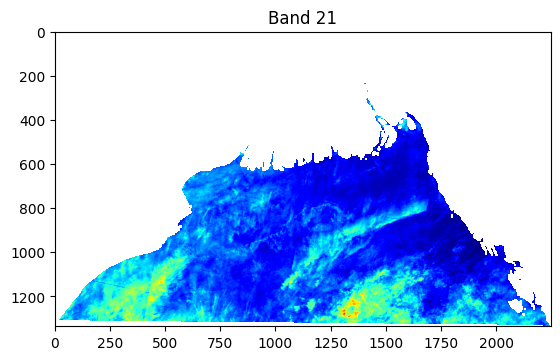

In [59]:
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_Dec_22.pdf


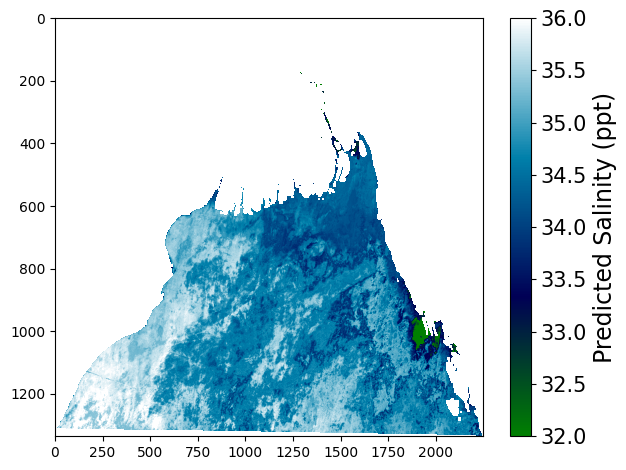

In [60]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect="auto", cmap='ocean', vmin=32, vmax=36)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

save_directory = r'D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3'
file_name = 'SEN3_BOB_Composite_Mean_Dec_22.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

# Show the violin plot
plt.show()

# Nov_composite

In [47]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_Nov_22.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

scale_factors = [1, 0.0139465, 0.0133873, 0.0121481, 0.0115198, 0.0100953, 0.0123538, 0.00879161, 0.00876539, 0.0095103, 0.00773378, 0.00675523, 0.0071996, 0.00749684, 0.0086512, 0.00526779, 0.00530267, 0.00493004, 0.00549962, 0.00502847, 0.00326378, 0.00324118]
for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * scale_factors[band_num]
    all_pixel_bands[:, :, band_num - 1] = band_data


print(all_pixel_bands.shape)


reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

columns=['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance', 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance', 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance', 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

(1336, 2249, 21)
Shape of DataFrame: (3004664, 21)


In [48]:
#array
np_array=dff.to_numpy()
np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_Nov.npy",np_array)

print("Data exported")

Data exported


In [49]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_Nov.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [50]:
dff[columns] = dff[columns].fillna(0)

In [51]:
X_new=dff[columns]
X_new

# Make predictions using the trained model
predictions = rf.predict(X_new)

data=np.reshape(predictions,(1336, 2249))
print(predictions.shape)
print(data)

(3004664,)
[[30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 ...
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]]


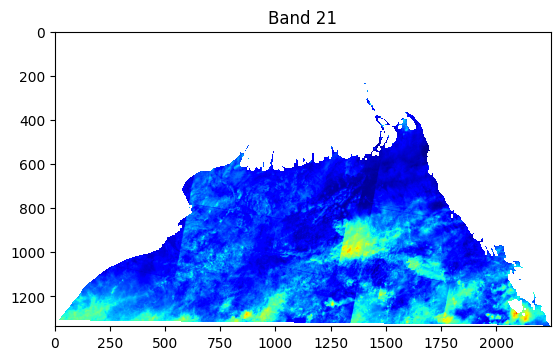

In [52]:
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_Nov_22.pdf


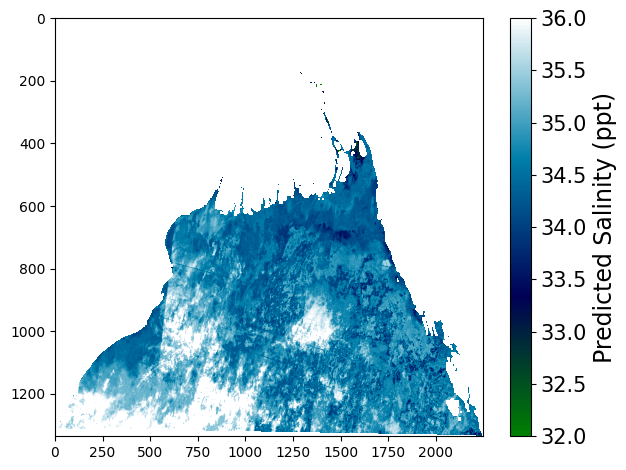

In [53]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect="auto", cmap='ocean', vmin=32, vmax=36)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

save_directory = r'D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3'
file_name = 'SEN3_BOB_Composite_Mean_Nov_22.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

# Show the violin plot
plt.show()

# Oct_Composite

In [61]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_Oct_22.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

scale_factors = [1, 0.0139465, 0.0133873, 0.0121481, 0.0115198, 0.0100953, 0.0123538, 0.00879161, 0.00876539, 0.0095103, 0.00773378, 0.00675523, 0.0071996, 0.00749684, 0.0086512, 0.00526779, 0.00530267, 0.00493004, 0.00549962, 0.00502847, 0.00326378, 0.00324118]
for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * scale_factors[band_num]
    all_pixel_bands[:, :, band_num - 1] = band_data


print(all_pixel_bands.shape)


reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

columns=['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance', 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance', 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance', 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

(1336, 2249, 21)
Shape of DataFrame: (3004664, 21)


In [62]:
#array
np_array=dff.to_numpy()
np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_Oct.npy",np_array)

print("Data exported")

Data exported


In [63]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_Oct.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [65]:
dff[columns] = dff[columns].fillna(0)

In [66]:
X_new=dff[columns]
X_new

# Make predictions using the trained model
predictions = rf.predict(X_new)

data=np.reshape(predictions,(1336, 2249))
print(predictions.shape)
print(data)

(3004664,)
[[30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 ...
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]]


Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_Oct_22.pdf


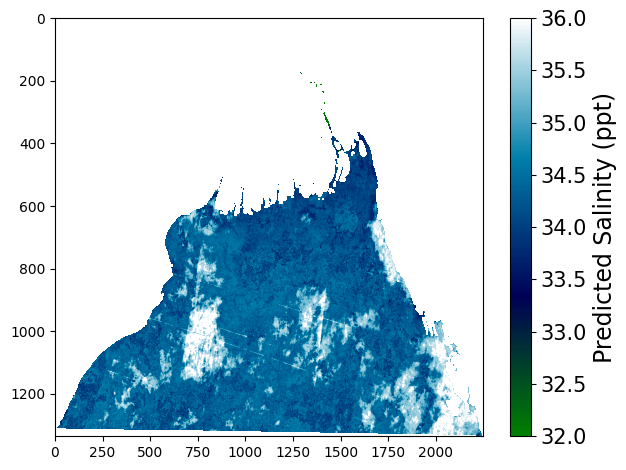

In [67]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect="auto", cmap='ocean', vmin=32, vmax=36)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

save_directory = r'D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3'
file_name = 'SEN3_BOB_Composite_Mean_Oct_22.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

# Show the violin plot
plt.show()

# Sept_Composite

In [73]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_Sept_22.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

scale_factors = [1, 0.0139465, 0.0133873, 0.0121481, 0.0115198, 0.0100953, 0.0123538, 0.00879161, 0.00876539, 0.0095103, 0.00773378, 0.00675523, 0.0071996, 0.00749684, 0.0086512, 0.00526779, 0.00530267, 0.00493004, 0.00549962, 0.00502847, 0.00326378, 0.00324118]
for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * scale_factors[band_num]
    all_pixel_bands[:, :, band_num - 1] = band_data


print(all_pixel_bands.shape)


reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

columns=['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance', 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance', 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance', 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

(1336, 2249, 21)
Shape of DataFrame: (3004664, 21)


In [74]:
#array
np_array=dff.to_numpy()
np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_Sept.npy",np_array)

print("Data exported")

Data exported


In [75]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_Sept.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [76]:
dff[columns] = dff[columns].fillna(0)

In [77]:
X_new=dff[columns]
X_new

# Make predictions using the trained model
predictions = rf.predict(X_new)

data=np.reshape(predictions,(1336, 2249))
print(predictions.shape)
print(data)

(3004664,)
[[30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 ...
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]]


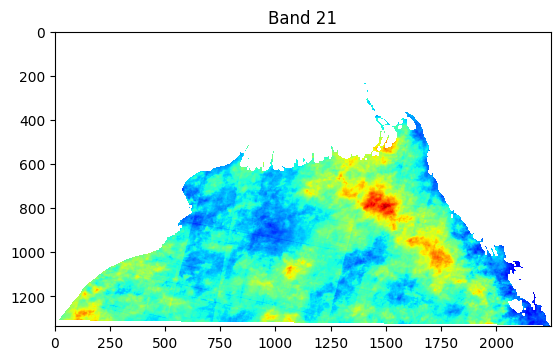

In [79]:
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_Sept_22.pdf


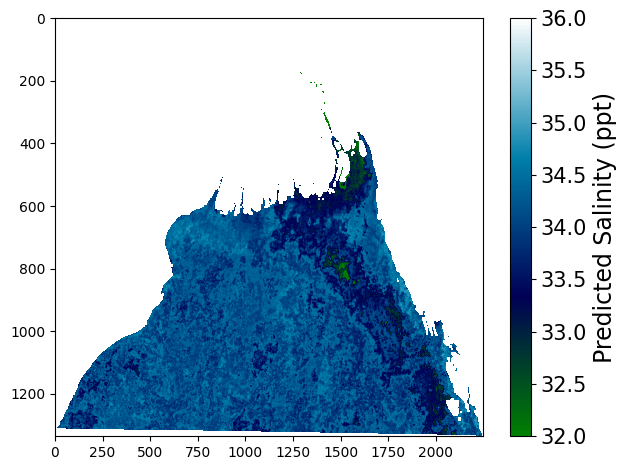

In [80]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect="auto", cmap='ocean', vmin=32, vmax=36)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

save_directory = r'D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3'
file_name = 'SEN3_BOB_Composite_Mean_Sept_22.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

# Show the violin plot
plt.show()

# Aug_Composite

In [82]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_Aug_22.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

scale_factors = [1, 0.0139465, 0.0133873, 0.0121481, 0.0115198, 0.0100953, 0.0123538, 0.00879161, 0.00876539, 0.0095103, 0.00773378, 0.00675523, 0.0071996, 0.00749684, 0.0086512, 0.00526779, 0.00530267, 0.00493004, 0.00549962, 0.00502847, 0.00326378, 0.00324118]
for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * scale_factors[band_num]
    all_pixel_bands[:, :, band_num - 1] = band_data


print(all_pixel_bands.shape)


reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

columns=['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance', 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance', 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance', 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

(1336, 2249, 21)
Shape of DataFrame: (3004664, 21)


In [83]:
#array
np_array=dff.to_numpy()
np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_Aug.npy",np_array)

print("Data exported")

Data exported


In [84]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_Aug.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [85]:
dff[columns] = dff[columns].fillna(0)

In [86]:
X_new=dff[columns]
X_new

# Make predictions using the trained model
predictions = rf.predict(X_new)

data=np.reshape(predictions,(1336, 2249))
print(predictions.shape)
print(data)

(3004664,)
[[30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 ...
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]]


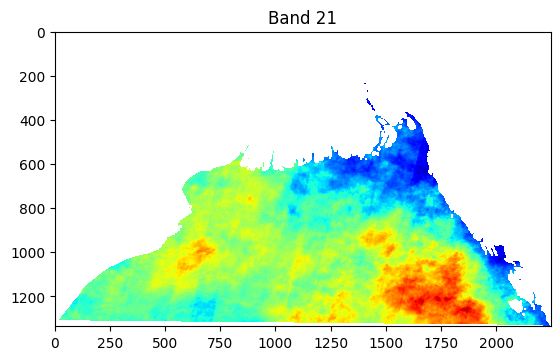

In [87]:
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_Aug_22.pdf


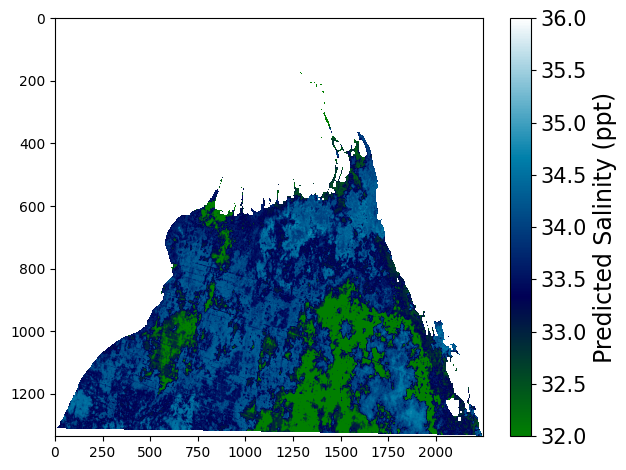

In [88]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect="auto", cmap='ocean', vmin=32, vmax=36)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

save_directory = r'D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3'
file_name = 'SEN3_BOB_Composite_Mean_Aug_22.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

# Show the violin plot
plt.show()

# July_Composite

In [89]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_July_22.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

scale_factors = [1, 0.0139465, 0.0133873, 0.0121481, 0.0115198, 0.0100953, 0.0123538, 0.00879161, 0.00876539, 0.0095103, 0.00773378, 0.00675523, 0.0071996, 0.00749684, 0.0086512, 0.00526779, 0.00530267, 0.00493004, 0.00549962, 0.00502847, 0.00326378, 0.00324118]
for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * scale_factors[band_num]
    all_pixel_bands[:, :, band_num - 1] = band_data


print(all_pixel_bands.shape)


reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

columns=['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance', 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance', 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance', 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

(1336, 2249, 21)
Shape of DataFrame: (3004664, 21)


In [90]:
#array
np_array=dff.to_numpy()
np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_July.npy",np_array)

print("Data exported")

Data exported


In [91]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_July.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [92]:
dff[columns] = dff[columns].fillna(0)

In [93]:
X_new=dff[columns]
X_new

# Make predictions using the trained model
predictions = rf.predict(X_new)

data=np.reshape(predictions,(1336, 2249))
print(predictions.shape)
print(data)

(3004664,)
[[30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 ...
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]]


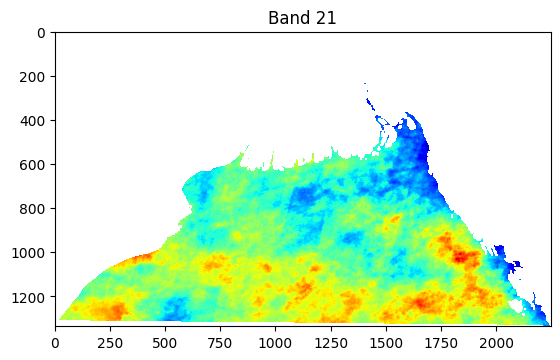

In [94]:
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_July_22.pdf


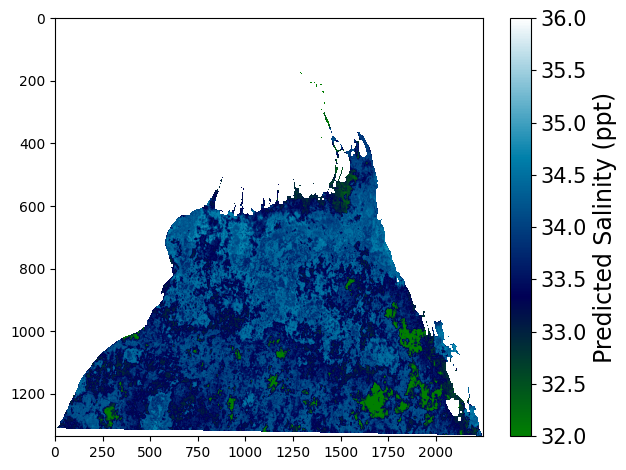

In [95]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect="auto", cmap='ocean', vmin=32, vmax=36)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

save_directory = r'D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3'
file_name = 'SEN3_BOB_Composite_Mean_July_22.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

# Show the violin plot
plt.show()

# June_Composite

In [96]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_June_22.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

scale_factors = [1, 0.0139465, 0.0133873, 0.0121481, 0.0115198, 0.0100953, 0.0123538, 0.00879161, 0.00876539, 0.0095103, 0.00773378, 0.00675523, 0.0071996, 0.00749684, 0.0086512, 0.00526779, 0.00530267, 0.00493004, 0.00549962, 0.00502847, 0.00326378, 0.00324118]
for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * scale_factors[band_num]
    all_pixel_bands[:, :, band_num - 1] = band_data


print(all_pixel_bands.shape)


reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

columns=['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance', 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance', 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance', 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

(1336, 2249, 21)
Shape of DataFrame: (3004664, 21)


In [97]:
#array
np_array=dff.to_numpy()
np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_June.npy",np_array)

print("Data exported")

Data exported


In [98]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_June.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [99]:
dff[columns] = dff[columns].fillna(0)

In [100]:
X_new=dff[columns]
X_new

# Make predictions using the trained model
predictions = rf.predict(X_new)

data=np.reshape(predictions,(1336, 2249))
print(predictions.shape)
print(data)

(3004664,)
[[30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 ...
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]]


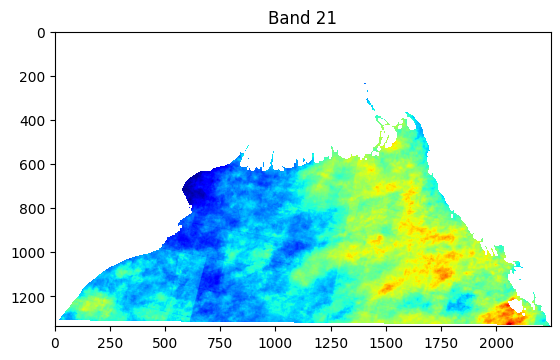

In [101]:
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_June_22.pdf


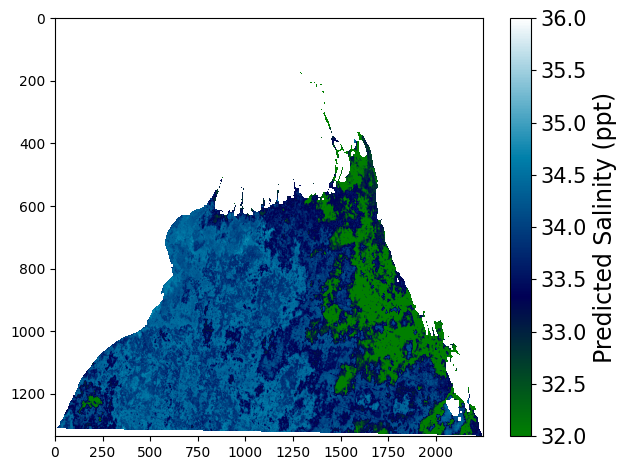

In [102]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect="auto", cmap='ocean', vmin=32, vmax=36)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

save_directory = r'D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3'
file_name = 'SEN3_BOB_Composite_Mean_June_22.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

# Show the violin plot
plt.show()

# May_Composite

In [103]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_May_22.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

scale_factors = [1, 0.0139465, 0.0133873, 0.0121481, 0.0115198, 0.0100953, 0.0123538, 0.00879161, 0.00876539, 0.0095103, 0.00773378, 0.00675523, 0.0071996, 0.00749684, 0.0086512, 0.00526779, 0.00530267, 0.00493004, 0.00549962, 0.00502847, 0.00326378, 0.00324118]
for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * scale_factors[band_num]
    all_pixel_bands[:, :, band_num - 1] = band_data


print(all_pixel_bands.shape)


reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

columns=['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance', 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance', 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance', 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

(1336, 2249, 21)
Shape of DataFrame: (3004664, 21)


In [104]:
#array
np_array=dff.to_numpy()
np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_May.npy",np_array)

print("Data exported")

Data exported


In [105]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_May.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [106]:
dff[columns] = dff[columns].fillna(0)

In [107]:
X_new=dff[columns]
X_new

# Make predictions using the trained model
predictions = rf.predict(X_new)

data=np.reshape(predictions,(1336, 2249))
print(predictions.shape)
print(data)

(3004664,)
[[30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 ...
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]]


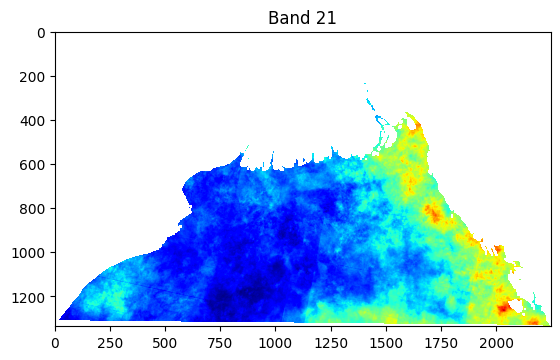

In [108]:
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_May_22.pdf


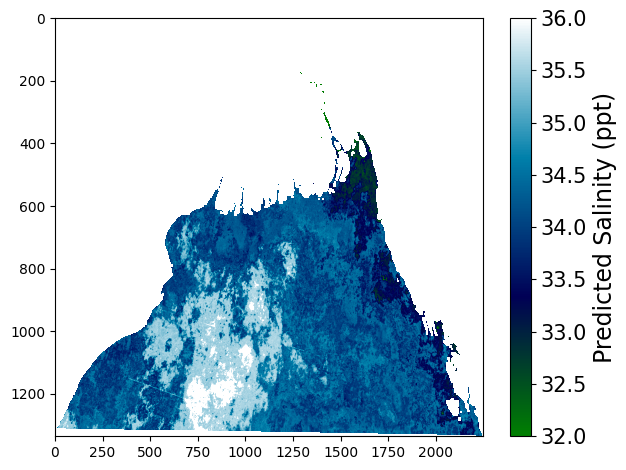

In [109]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect="auto", cmap='ocean', vmin=32, vmax=36)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

save_directory = r'D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3'
file_name = 'SEN3_BOB_Composite_Mean_May_22.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

# Show the violin plot
plt.show()

# April_Composite

In [110]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_April_22.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

scale_factors = [1, 0.0139465, 0.0133873, 0.0121481, 0.0115198, 0.0100953, 0.0123538, 0.00879161, 0.00876539, 0.0095103, 0.00773378, 0.00675523, 0.0071996, 0.00749684, 0.0086512, 0.00526779, 0.00530267, 0.00493004, 0.00549962, 0.00502847, 0.00326378, 0.00324118]
for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * scale_factors[band_num]
    all_pixel_bands[:, :, band_num - 1] = band_data


print(all_pixel_bands.shape)


reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

columns=['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance', 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance', 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance', 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

(1336, 2249, 21)
Shape of DataFrame: (3004664, 21)


In [111]:
#array
np_array=dff.to_numpy()
np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_April.npy",np_array)

print("Data exported")

Data exported


In [112]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_April.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [113]:
dff[columns] = dff[columns].fillna(0)

In [114]:
X_new=dff[columns]
X_new

# Make predictions using the trained model
predictions = rf.predict(X_new)

data=np.reshape(predictions,(1336, 2249))
print(predictions.shape)
print(data)

(3004664,)
[[30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 ...
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]]


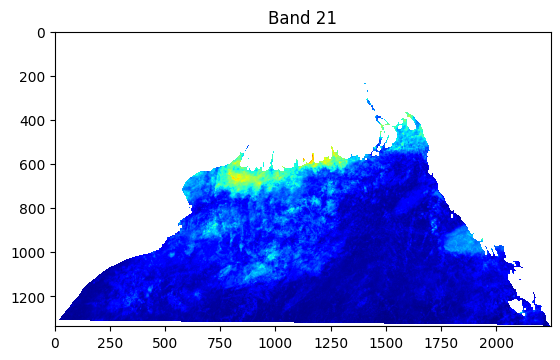

In [115]:
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_April_22.pdf


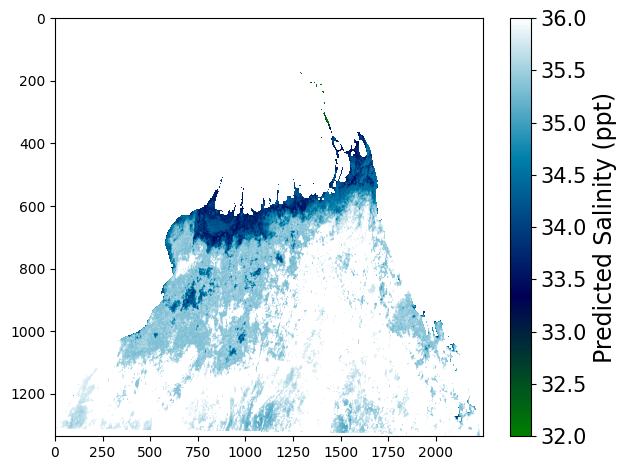

In [116]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect="auto", cmap='ocean', vmin=32, vmax=36)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

save_directory = r'D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3'
file_name = 'SEN3_BOB_Composite_Mean_April_22.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

# Show the violin plot
plt.show()

# March_Composite

In [117]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_March_22.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

scale_factors = [1, 0.0139465, 0.0133873, 0.0121481, 0.0115198, 0.0100953, 0.0123538, 0.00879161, 0.00876539, 0.0095103, 0.00773378, 0.00675523, 0.0071996, 0.00749684, 0.0086512, 0.00526779, 0.00530267, 0.00493004, 0.00549962, 0.00502847, 0.00326378, 0.00324118]
for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * scale_factors[band_num]
    all_pixel_bands[:, :, band_num - 1] = band_data


print(all_pixel_bands.shape)


reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

columns=['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance', 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance', 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance', 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

(1336, 2249, 21)
Shape of DataFrame: (3004664, 21)


In [118]:
#array
np_array=dff.to_numpy()
np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_March.npy",np_array)

print("Data exported")

Data exported


In [119]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_March.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [120]:
dff[columns] = dff[columns].fillna(0)

In [121]:
X_new=dff[columns]
X_new

# Make predictions using the trained model
predictions = rf.predict(X_new)

data=np.reshape(predictions,(1336, 2249))
print(predictions.shape)
print(data)

(3004664,)
[[30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 ...
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]]


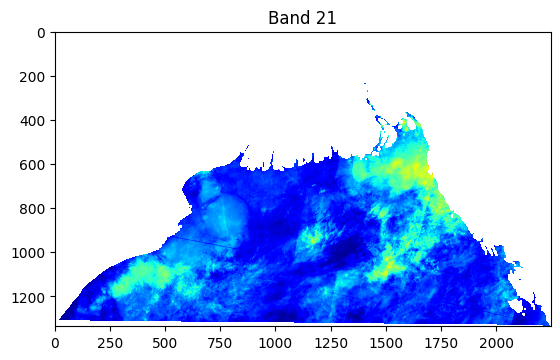

In [122]:
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_March_22.pdf


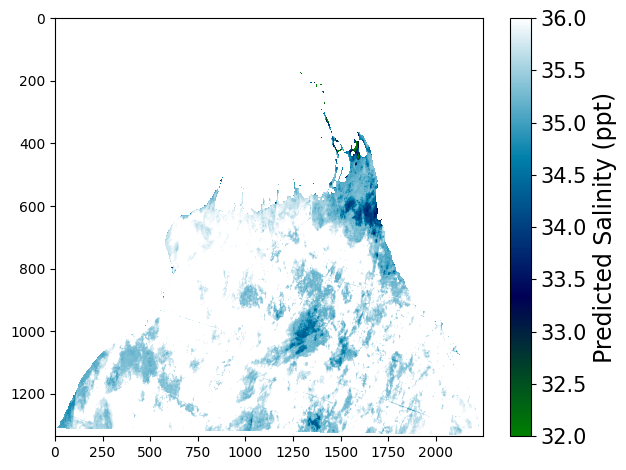

In [123]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect="auto", cmap='ocean', vmin=32, vmax=36)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

save_directory = r'D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3'
file_name = 'SEN3_BOB_Composite_Mean_March_22.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

# Show the violin plot
plt.show()

# Complete Year

In [141]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_March22_Feb23.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

scale_factors = [1, 0.0139465, 0.0133873, 0.0121481, 0.0115198, 0.0100953, 0.0123538, 0.00879161, 0.00876539, 0.0095103, 0.00773378, 0.00675523, 0.0071996, 0.00749684, 0.0086512, 0.00526779, 0.00530267, 0.00493004, 0.00549962, 0.00502847, 0.00326378, 0.00324118]
for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * scale_factors[band_num]
    all_pixel_bands[:, :, band_num - 1] = band_data


print(all_pixel_bands.shape)


reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

columns=['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance', 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance', 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance', 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

(1336, 2249, 21)
Shape of DataFrame: (3004664, 21)


In [142]:
#array
np_array=dff.to_numpy()
np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_22_23.npy",np_array)

print("Data exported")

Data exported


In [149]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_22_23.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [150]:
dff[columns] = dff[columns].fillna(0)

In [151]:
X_new=dff[columns]
X_new

# Make predictions using the trained model
predictions = rf.predict(X_new)

data=np.reshape(predictions,(1336, 2249))
print(predictions.shape)
print(data)

(3004664,)
[[30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 ...
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]
 [30.01126324 30.01126324 30.01126324 ... 30.01126324 30.01126324
  30.01126324]]


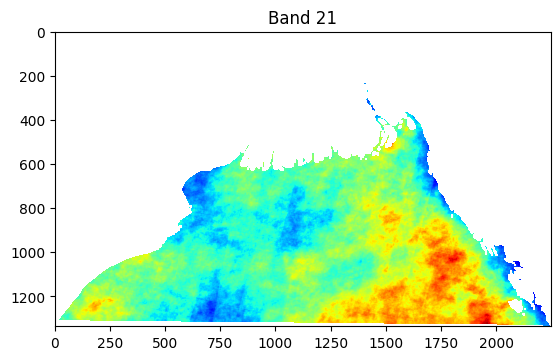

In [152]:
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_BOB_Composite_Mean_22_23_delta.pdf


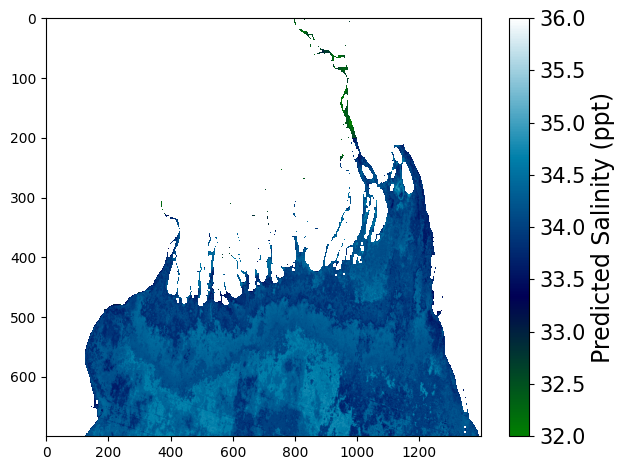

In [162]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
plt.imshow(data[150:850,450:1850], aspect="auto", cmap='ocean', vmin=32, vmax=36)

# plt.imshow(data, aspect="auto", cmap='ocean', vmin=32, vmax=36)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

save_directory = r'D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3'
file_name = 'SEN3_BOB_Composite_Mean_22_23_delta.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

# Show the violin plot
plt.show()

# AO_FULL_Composite

In [5]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN_AO_Mean_Composite_March22_Feb23-0000000000-0000005120.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

scale_factors = [1, 0.0139465, 0.0133873, 0.0121481, 0.0115198, 0.0100953, 0.0123538, 0.00879161, 0.00876539, 0.0095103, 0.00773378, 0.00675523, 0.0071996, 0.00749684, 0.0086512, 0.00526779, 0.00530267, 0.00493004, 0.00549962, 0.00502847, 0.00326378, 0.00324118]
for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * scale_factors[band_num]
    all_pixel_bands[:, :, band_num - 1] = band_data


print(all_pixel_bands.shape)


reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

columns=['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance', 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance', 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance', 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

(5120, 3180, 21)
Shape of DataFrame: (16281600, 21)


In [ ]:
#array
np_array=dff.to_numpy()
np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN_AO_Mean_Composite_March22_Feb23-0000000000-0000005120.npy",np_array)

print("Data exported")

In [6]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN_AO_Mean_Composite_March22_Feb23-0000000000-0000005120.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [7]:
dff[columns] = dff[columns].fillna(0)

In [9]:
X_new=dff[columns]
X_new

# Make predictions using the trained model
predictions = rf.predict(X_new)

data=np.reshape(predictions,(5120, 3180))
print(predictions.shape)
print(data)

(16281600,)
[[30.94192332 30.94192332 30.94192332 ... 30.94192332 30.94192332
  30.94192332]
 [30.94192332 30.94192332 30.94192332 ... 30.94192332 30.94192332
  30.94192332]
 [30.94192332 30.94192332 30.94192332 ... 30.94192332 30.94192332
  30.94192332]
 ...
 [36.17536591 36.38758469 36.27790365 ... 30.94192332 30.94192332
  30.94192332]
 [36.20225234 36.23100917 36.22231905 ... 30.94192332 30.94192332
  30.94192332]
 [36.2438666  36.239828   36.25612838 ... 30.94192332 30.94192332
  30.94192332]]


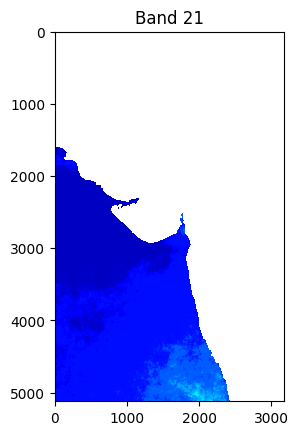

In [10]:
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN_AO_Mean_Composite_March22_Feb23-0000000000-0000005120_gulf_crop.pdf


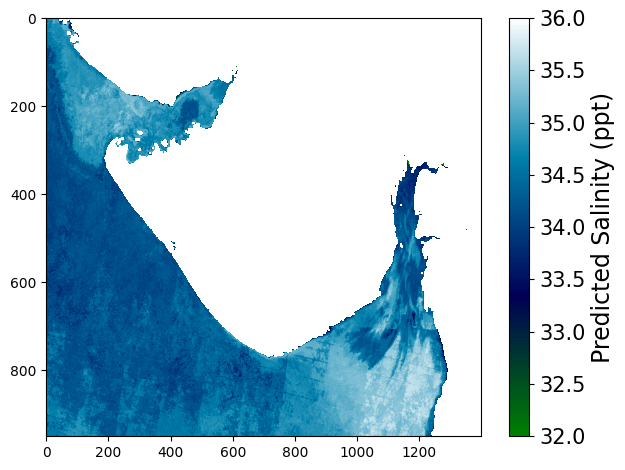

In [18]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
# plt.imshow(data[1800:3300,400:2100], aspect="auto", cmap='ocean', vmin=32, vmax=36)
plt.imshow(data[2150:3100,600:2000], aspect="auto", cmap='ocean', vmin=32, vmax=36)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

save_directory = r'D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3'
file_name = 'SEN_AO_Mean_Composite_March22_Feb23-0000000000-0000005120_gulf_crop.pdf'#

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

# Show the violin plot
plt.show()